In [1]:
#IMPORTING THE IMPORTANT LIBRARIES:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#LOADING THE DATASET:-
titanic_data = pd.read_csv("Titanic_Dataset.csv") 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

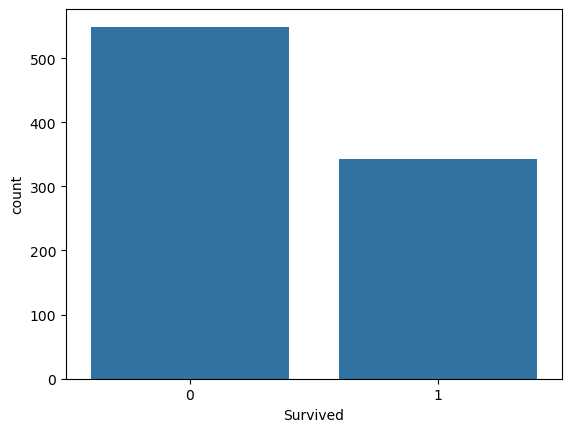

In [3]:
#EXPLORATORY DATA ANALYSIS(EDA)
# Explore the data
print(titanic_data.head())
print(titanic_data.info())
print(titanic_data.describe())

# Visualize the data
sns.countplot(x='Survived', data=titanic_data)
plt.show()

In [4]:
#Count Survived Passengers:
survived_count = titanic_data['Survived'].sum()
print("Total number of survived passengers:", survived_count)

Total number of survived passengers: 342


In [5]:
#Handle Missing Values:
# Fill missing values (e.g., for 'Age')
titanic_data['Sex'] = titanic_data['Sex'].fillna(titanic_data['Sex'].mode())
print(titanic_data['Sex'])


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [6]:
#Feature Engineering:
# Create new features (e.g., 'Title' from 'Name')
titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)',expand=False)
print(titanic_data['Title'])
# Combine categorical features (e.g., 'Sex' and 'Name')
titanic_data['Sex_Name'] = titanic_data['Sex'] + '_' + titanic_data['Name']
print(titanic_data['Sex_Name'])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Title, Length: 891, dtype: object
0                           male_Braund, Mr. Owen Harris
1      female_Cumings, Mrs. John Bradley (Florence Br...
2                          female_Heikkinen, Miss. Laina
3      female_Futrelle, Mrs. Jacques Heath (Lily May ...
4                          male_Allen, Mr. William Henry
                             ...                        
886                           male_Montvila, Rev. Juozas
887                  female_Graham, Miss. Margaret Edith
888      female_Johnston, Miss. Catherine Helen "Carrie"
889                           male_Behr, Mr. Karl Howell
890                             male_Dooley, Mr. Patrick
Name: Sex_Name, Length: 891, dtype: object


In [7]:
#FEATURE ENGINEERING FOR HANDLING CATEGORIAL DATA
#Encode Categorical Features:
le = LabelEncoder()
categorical_cols =[ 'Name' ,'Sex', 'Embarked', 'Title', 'Sex_Name'] #assuming this as category
for col in categorical_cols:
    titanic_data[col] = le.fit_transform(titanic_data[col])

titanic_data[col]


0      375
1       73
2      123
3      100
4      324
      ... 
886    666
887    108
888    146
889    357
890    452
Name: Sex_Name, Length: 891, dtype: int32

In [56]:
#to see which datatype is in X_train DATAFRAME and will also show the problematic column
print(X_train.dtypes)

PassengerId    int64
Survived       int64
Pclass         int64
Name           int32
Sex            int32
SibSp          int64
Parch          int64
Embarked       int32
Title          int32
Sex_Name       int32
dtype: object


In [57]:
#Split Data into Features(X) and Target VARIABLE(y):
X = titanic_data.drop(['Cabin','Ticket','Fare','Age'], axis=1)
y = titanic_data['Survived']


In [58]:
#Split Data into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
#Choose and Train a Model:
# Logistic Regression (you can experiment with other models)
model = LogisticRegression(max_iter=9000)  # Default is 100
model.fit(X_train, y_train)


LogisticRegression(max_iter=9000)

In [60]:
# Use the scaled data for predictions on test set
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [61]:
# Evaluate the model (optional)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0
